In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\MadiL\CS110 CodeBase\CPSC110env\Epidemiology.csv')
df.head()

Unnamed: 0  YearStart  YearEnd LocationAbbr LocationDesc DataSource  \
0           0       2019     2019           GA      Georgia      BRFSS   
1           1       2019     2019           GU         Guam      BRFSS   
2           2       2019     2019           GU         Guam      BRFSS   
3           3       2019     2019           ME        Maine      BRFSS   
4           4       2019     2019           NV       Nevada       NVSS   

           Topic                            Question DataValueUnit  \
0     Disability          Adults with any disability             %   
1      Arthritis              Arthritis among adults             %   
2   Immunization  Influenza vaccination among adults             %   
3       Diabetes               Diabetes among adults             %   
4  Health Status            Life expectancy at birth         Years   

      DataValueType  ...  HighConfidenceLimit  StratificationCategory1  \
0  Crude Prevalence  ...                 47.1                      Age   
1  Crude Prevalence  ...                 18.9                      Sex   
2  Crude Prevalence  ...                 34.0                      Sex   
3  Crude Prevalence  ...                 12.7                      Sex   
4            Number  ...                 78.2                  Overall   

   Stratification1                                     Geolocation LocationID  \
0         Age >=65    POINT (-83.62758034599966 32.83968109300048)         13   
1           Female                    POINT (144.793731 13.444304)         66   
2             Male                    POINT (144.793731 13.444304)         66   
3             Male   POINT (-68.98503133599962 45.254228894000505)         23   
4          Overall  POINT (-117.07184056399967 39.493240390000494)         32   

  TopicID QuestionID  DataValueTypeID StratificationCategoryID1  \
0     DIS      DIS01          CRDPREV                       AGE   
1     ART      ART01          CRDPREV                       SEX   
2     IMM      IMM01          CRDPREV                       SEX   
3     DIA      DIA01          CRDPREV                       SEX   
4     HEA      HEA06             NMBR                   OVERALL   

  StratificationID1  
0            AGE65P  
1              SEXF  
2              SEXM  
3              SEXM  
4               OVR  

[5 rows x 23 columns]

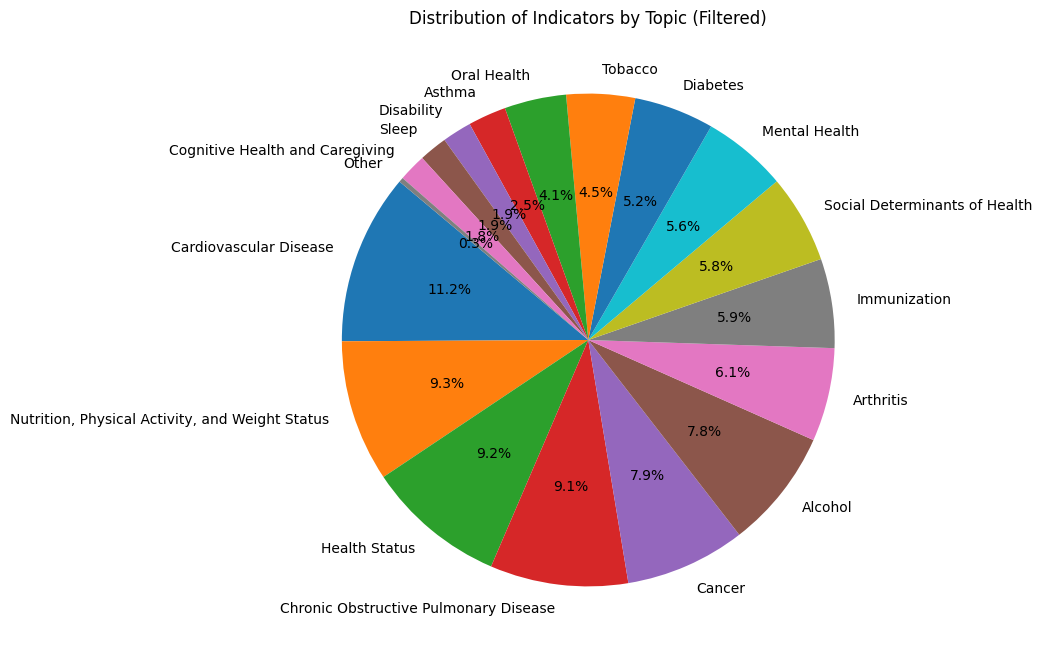

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'Topic' and count the occurrences
topic_counts = df['Topic'].value_counts()

# Set a threshold to combine small topics into an "Other" category
threshold = 0.01  # Example threshold of 1%
large_topics = topic_counts[topic_counts / topic_counts.sum() > threshold]
small_topics_sum = topic_counts[topic_counts / topic_counts.sum() <= threshold].sum()

# Concatenate "Other" category
topic_counts_filtered = pd.concat([large_topics, pd.Series([small_topics_sum], index=["Other"])])

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(topic_counts_filtered, labels=topic_counts_filtered.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Indicators by Topic (Filtered)')
plt.show()


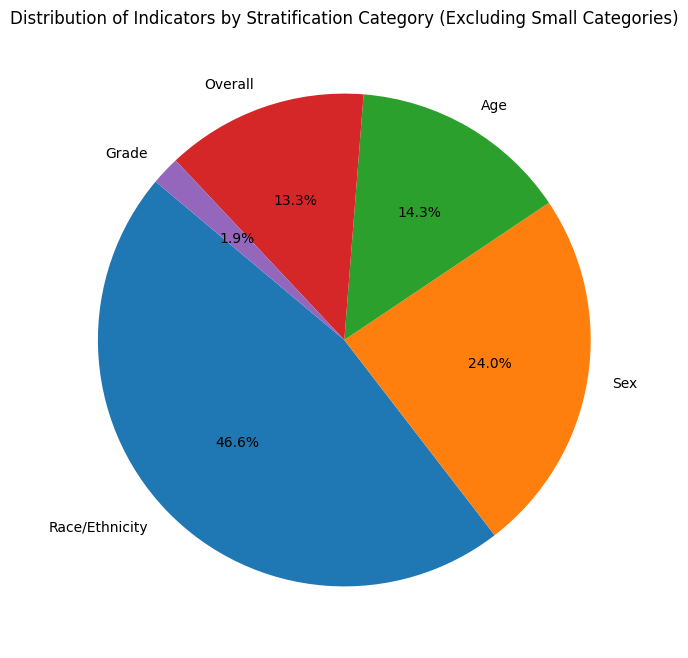

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'StratificationCategory1' and count occurrences
topic_counts = df['StratificationCategory1'].value_counts()

# Set a threshold for minimum representation
threshold = 0.01  # Only keep categories that represent more than 1%

# Filter out categories that don't meet the threshold
topic_counts_filtered = topic_counts[topic_counts / topic_counts.sum() > threshold]

# Plot the pie chart without the "Other" category
plt.figure(figsize=(10, 8))
plt.pie(
    topic_counts_filtered, 
    labels=topic_counts_filtered.index, 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title('Distribution of Indicators by Stratification Category (Excluding Small Categories)')
plt.show()


C:\Users\MadiL\AppData\Local\Temp\ipykernel_26956\4005014206.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=disability_df, x='LocationAbbr', y='DataValue', palette='viridis')


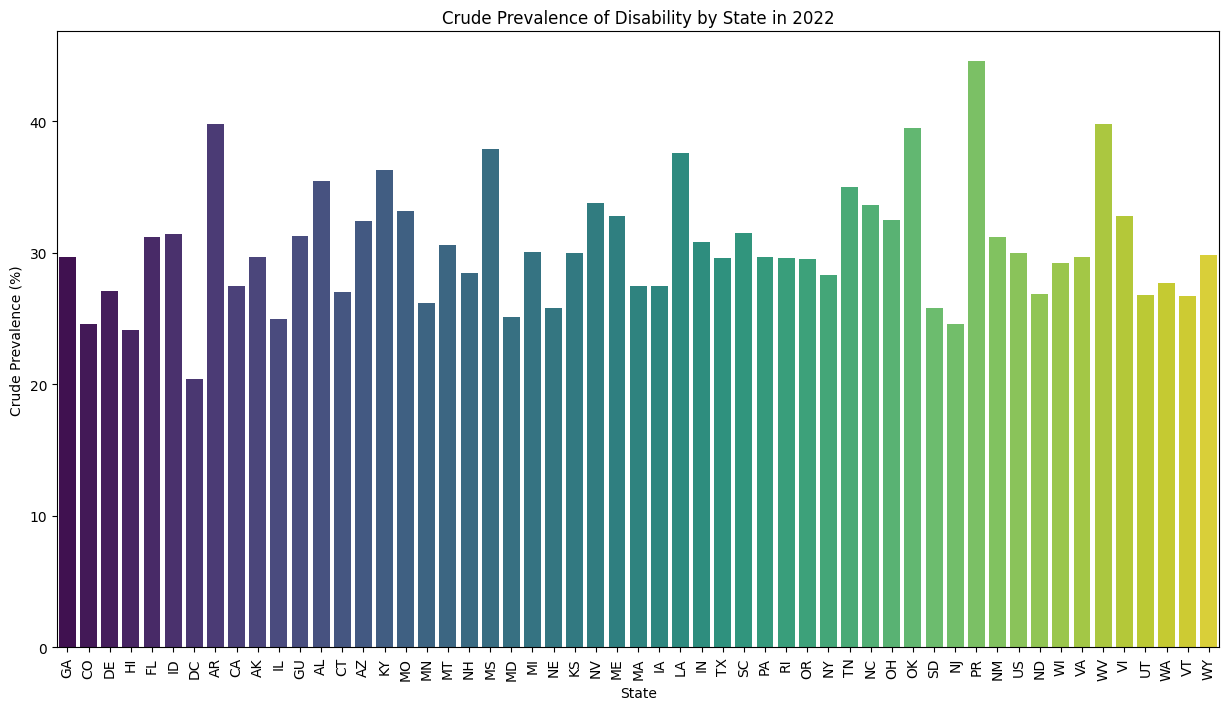

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter data for 'Disability' topic and 'Crude Prevalence' type and 'Overall' Stratification
disability_df = df[(df['Topic'] == 'Disability') & (df['DataValueType'] == 'Crude Prevalence') & (df['StratificationCategory1'] == 'Overall')]

# Select data for the most recent year available
latest_year = disability_df['YearEnd'].max()
disability_df = disability_df[disability_df['YearStart'] == latest_year]

# Drop rows with missing DataValue
disability_df = disability_df.dropna(subset=['DataValue'])

# Convert DataValue to numeric, in case it's stored as string
disability_df['DataValue'] = pd.to_numeric(disability_df['DataValue'], errors='coerce')

# Plotting: Bar plot of crude prevalence of disability by state
plt.figure(figsize=(15, 8))
sns.barplot(data=disability_df, x='LocationAbbr', y='DataValue', palette='viridis')
plt.title(f'Crude Prevalence of Disability by State in {latest_year}')
plt.xlabel('State')
plt.ylabel('Crude Prevalence (%)')
plt.xticks(rotation=90)
plt.show()


In [6]:
disability_df.head()

Unnamed: 0  YearStart  YearEnd LocationAbbr LocationDesc DataSource  \
176909      263829       2022     2022           GA      Georgia      BRFSS   
177420      264576       2022     2022           CO     Colorado      BRFSS   
178427      266033       2022     2022           DE     Delaware      BRFSS   
178665      266371       2022     2022           HI       Hawaii      BRFSS   
178722      266447       2022     2022           FL      Florida      BRFSS   

             Topic                    Question DataValueUnit  \
176909  Disability  Adults with any disability             %   
177420  Disability  Adults with any disability             %   
178427  Disability  Adults with any disability             %   
178665  Disability  Adults with any disability             %   
178722  Disability  Adults with any disability             %   

           DataValueType  ...  HighConfidenceLimit  StratificationCategory1  \
176909  Crude Prevalence  ...                 31.1                  Overall   
177420  Crude Prevalence  ...                 25.7                  Overall   
178427  Crude Prevalence  ...                 29.0                  Overall   
178665  Crude Prevalence  ...                 25.4                  Overall   
178722  Crude Prevalence  ...                 32.9                  Overall   

        Stratification1                                     Geolocation  \
176909          Overall    POINT (-83.62758034599966 32.83968109300048)   
177420          Overall  POINT (-106.13361092099967 38.843840757000464)   
178427          Overall   POINT (-75.57774116799965 39.008830667000495)   
178665          Overall  POINT (-157.85774940299973 21.304850435000446)   
178722          Overall   POINT (-81.92896053899966 28.932040377000476)   

       LocationID TopicID QuestionID  DataValueTypeID  \
176909         13     DIS      DIS01          CRDPREV   
177420          8     DIS      DIS01          CRDPREV   
178427         10     DIS      DIS01          CRDPREV   
178665         15     DIS      DIS01          CRDPREV   
178722         12     DIS      DIS01          CRDPREV   

       StratificationCategoryID1 StratificationID1  
176909                   OVERALL               OVR  
177420                   OVERALL               OVR  
178427                   OVERALL               OVR  
178665                   OVERALL               OVR  
178722                   OVERALL               OVR  

[5 rows x 23 columns]

In [8]:
# Import pandas
import pandas as pd


# Group by 'Topic' and get unique 'Question' for each topic
unique_topics_questions = df.groupby('Topic')['Question'].unique().reset_index()

# Display the results
for index, row in unique_topics_questions.iterrows():
    print(f"Topic: {row['Topic']}")
    print("Questions:")
    for question in row['Question']:
        print(f"  - {question}")
    print("\n" + "="*50 + "\n")


Topic: Alcohol
Questions:
  - Binge drinking prevalence among adults
  - Alcohol use among high school students
  - Binge drinking frequency among adults who binge drink
  - Chronic liver disease mortality among all people, underlying cause
  - Binge drinking prevalence among high school students
  - Binge drinking intensity among adults who binge drink
  - Per capita alcohol consumption among people aged 14 years and older


Topic: Arthritis
Questions:
  - Arthritis among adults
  - Severe joint pain among adults with arthritis
  - Physical inactivity among adults with arthritis
  - Received health care provider counseling for physical activity among adults with arthritis
  - Activity limitation due to arthritis among adults with arthritis
  - Work limitation due to arthritis among adults aged 18-64 years with arthritis
  - Have taken an educational class to learn how to manage arthritis symptoms among adults with arthritis


Topic: Asthma
Questions:
  - Current asthma among adults
  

C:\Users\MadiL\AppData\Local\Temp\ipykernel_26956\663526815.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=diabetes_df, x='YearStart', y='DataValue', hue='Stratification1', ci=None)


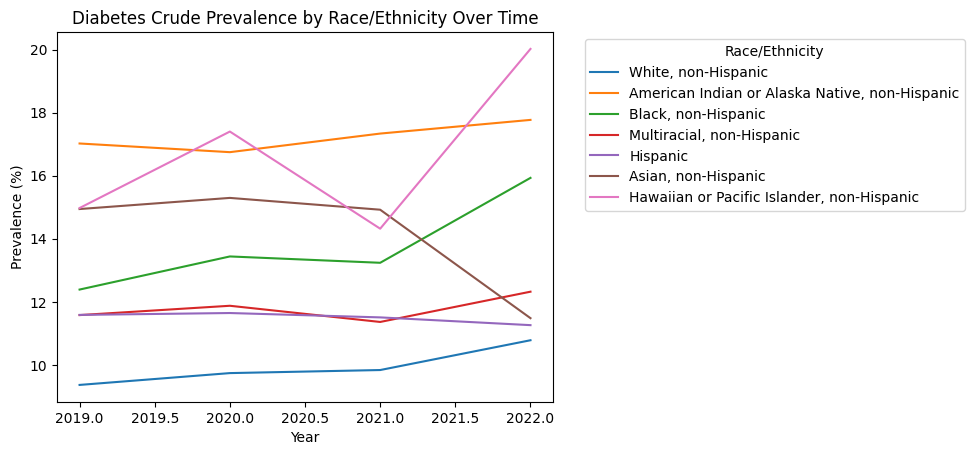

In [9]:
# Example: Trends for diabetes prevalence over time by race
diabetes_df = df[(df['Topic'] == 'Diabetes') & (df['DataValueType'] == 'Crude Prevalence') & (df['StratificationCategory1'] == 'Race/Ethnicity')]

plt.figure(figsize=(6.4, 4.8))
sns.lineplot(data=diabetes_df, x='YearStart', y='DataValue', hue='Stratification1', ci=None)
plt.title('Diabetes Crude Prevalence by Race/Ethnicity Over Time')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


If you're seeing an "aura" effect or unintended aggregation, there might be multiple entries for each (YearStart, Stratification1) combination in your diabetes_df DataFrame. This would lead Seaborn to automatically aggregate and display confidence intervals, which can create a "shadow" or "aura" around each line.

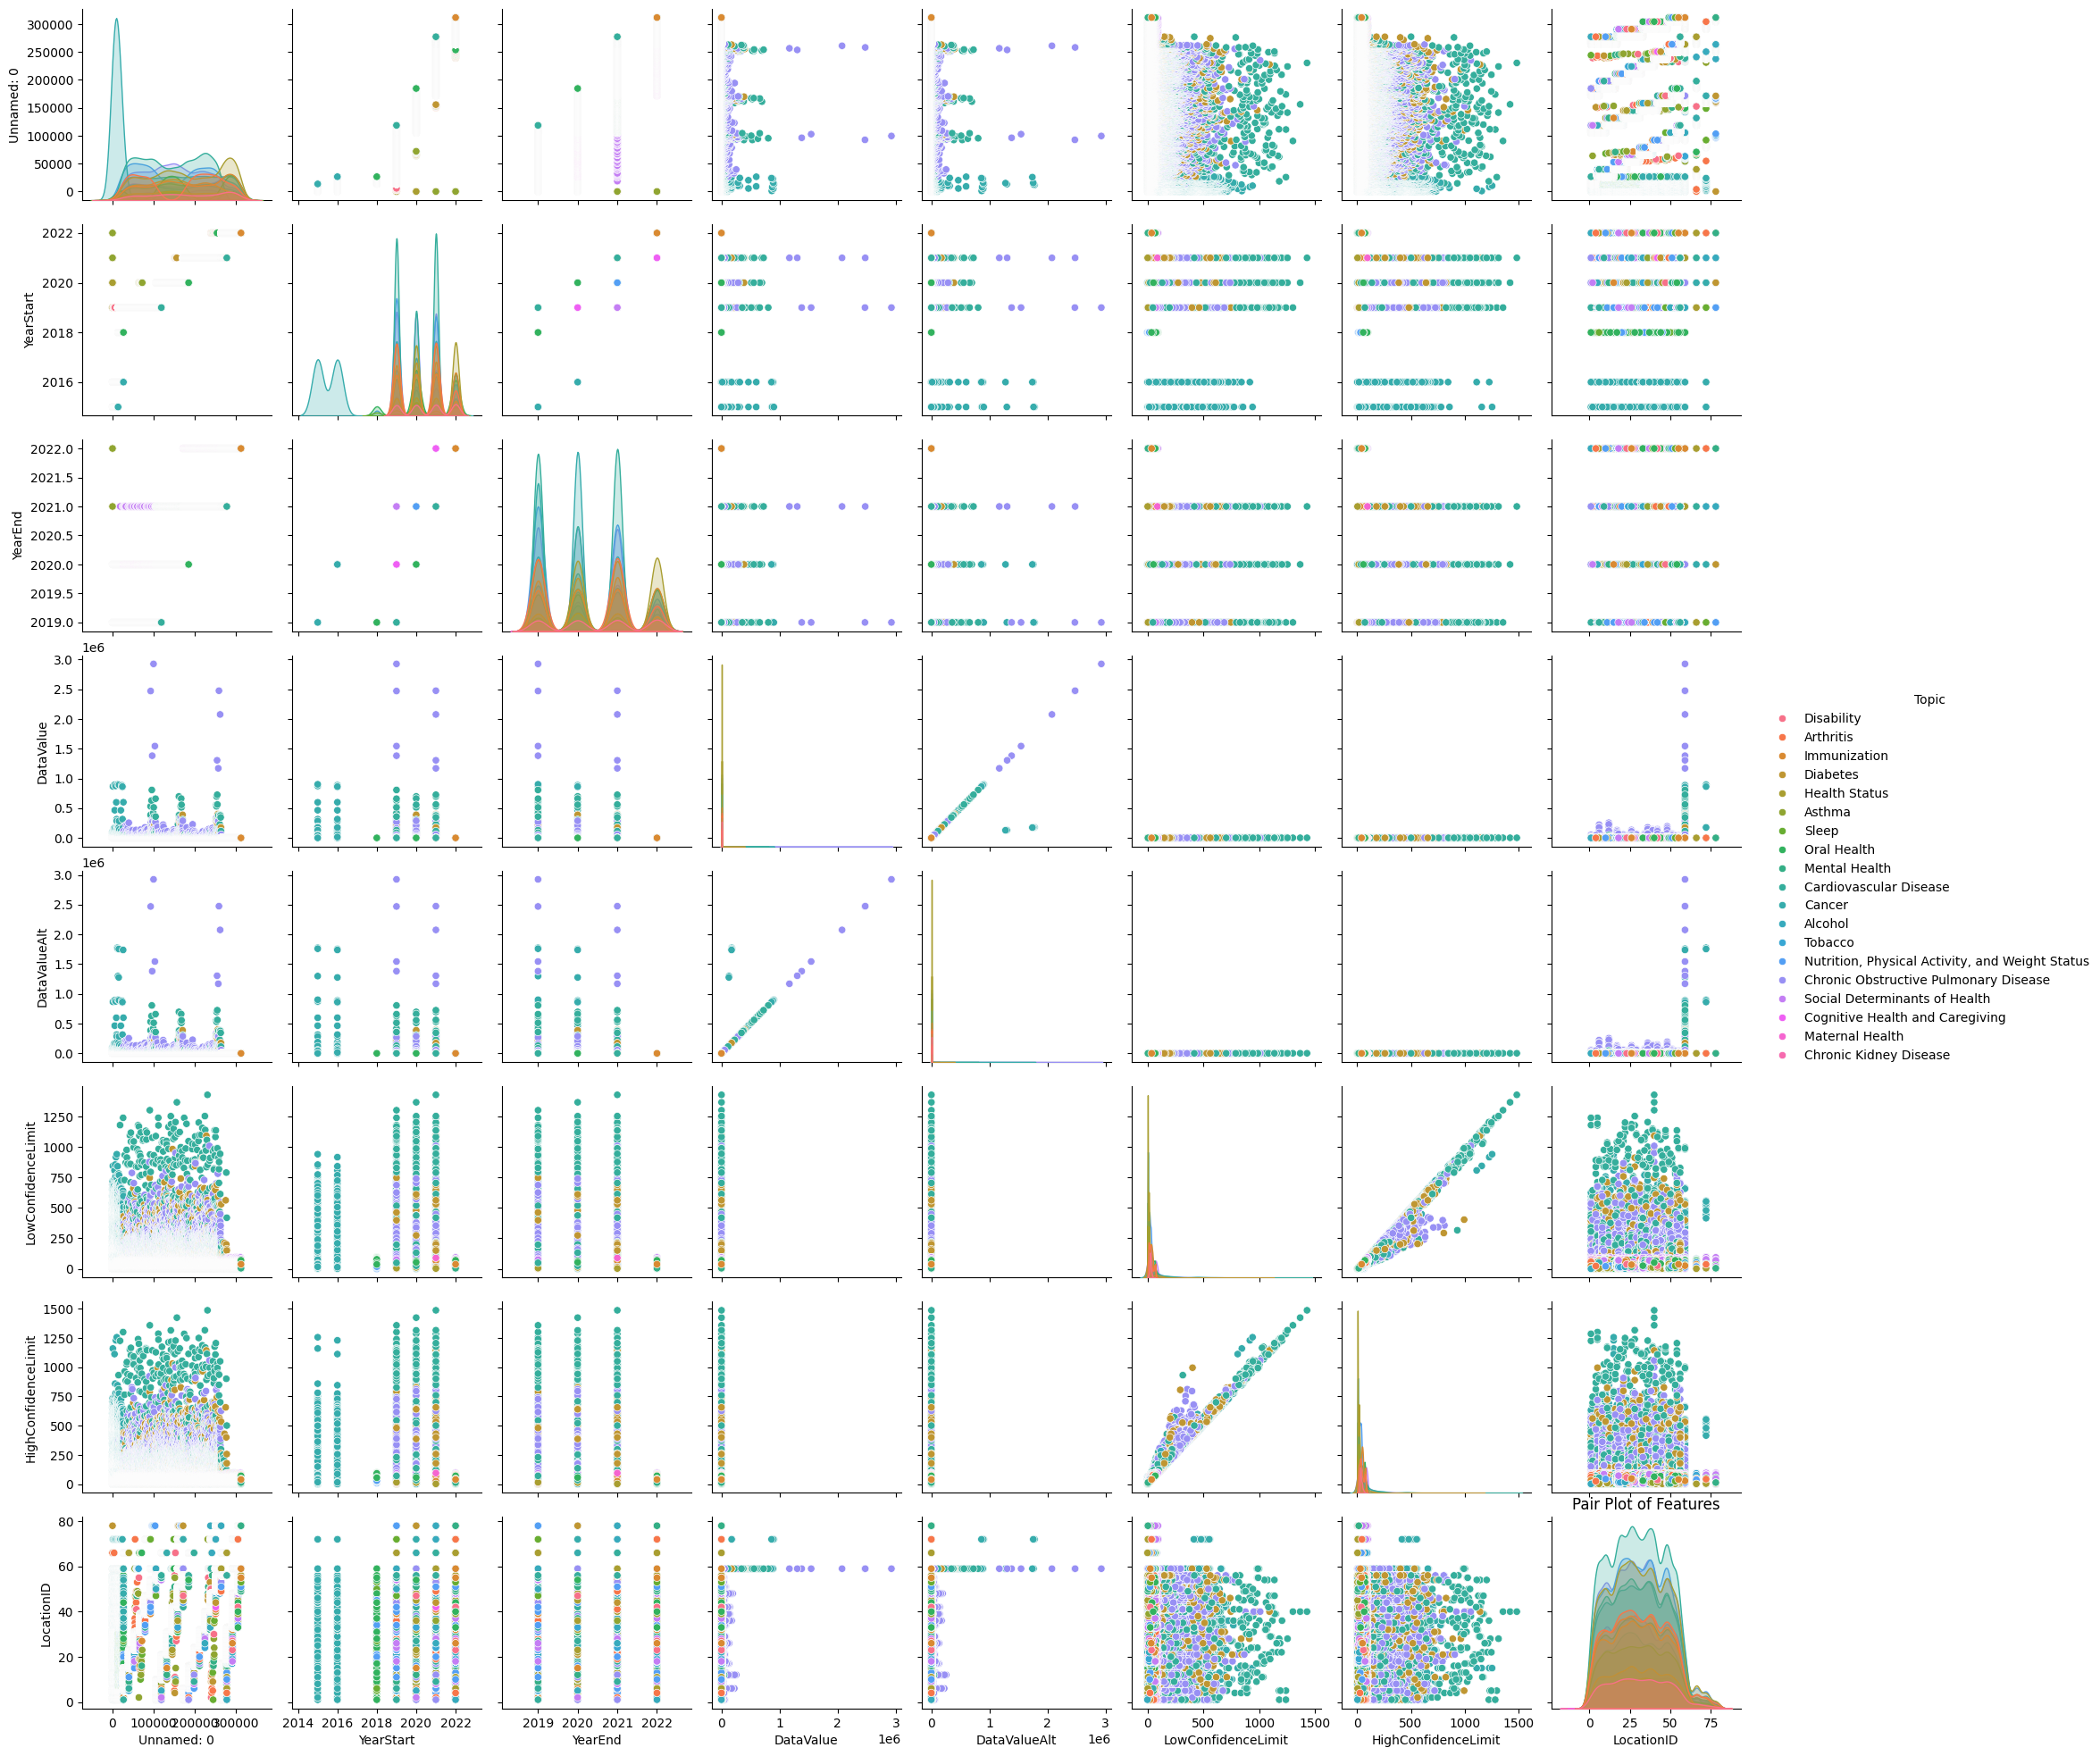

In [ ]:
#sns.pairplot(df, hue='Topic')  # Replace with your target column
#plt.title('Pair Plot of Features')
#plt.show()


In [10]:
# Example: Clustering for hidden patterns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select columns that are relevant for clustering
clustering_cols = ['DataValue', 'YearStart', 'YearEnd', 'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1']

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[clustering_cols])

# Perform k-means clustering
kmeans = KMeans(n_clusters=8).fit(df_scaled)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to the original dataframe
df['Cluster'] = labels

# Group by clusters and get the mean/median of the features
cluster_summary = df.groupby('Cluster')[clustering_cols].agg(['mean', 'median'])

# Print the cluster summary
print(cluster_summary)

# Visualize the clusters
sns.pairplot(df, hue='Cluster')
plt.title('Pair Plot of Clusters')
plt.show()


ValueError: could not convert string to float: 'CRDPREV'

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your data

# Select the features you want to use for clustering
features = ['DataValue', 'YearStart', 'YearEnd', 'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1']
# Scale your data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5)  # Choose the number of clusters based on your analysis
kmeans.fit(df_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to your original dataframe
df['Cluster'] = labels

# Examine the characteristics of each cluster
print(df.groupby('Cluster').mean())

ValueError: could not convert string to float: 'CRDPREV'

        DataValueTypeID           YearStart              YearEnd          \
                   mean median         mean  median         mean  median   
Cluster                                                                    
0              1.087249    1.0  2021.558650  2022.0  2021.596879  2022.0   
1              1.398751    1.0  2018.290124  2019.0  2019.110199  2019.0   
2              7.363492    7.0  2020.449268  2020.0  2020.492642  2020.0   
3              7.052862    7.0  2020.304929  2020.0  2020.362427  2020.0   
4              7.053360    7.0  2021.394826  2021.0  2021.432175  2021.0   
5              8.500000    8.5  2015.498923  2015.0  2019.498923  2019.0   
6              1.281237    1.0  2020.311159  2020.0  2020.329397  2020.0   
7              7.352017    7.0  2019.188552  2019.0  2019.222514  2019.0   

        DataValueTypeID        StratificationCategoryID1         \
                   mean median                      mean median   
Cluster                      

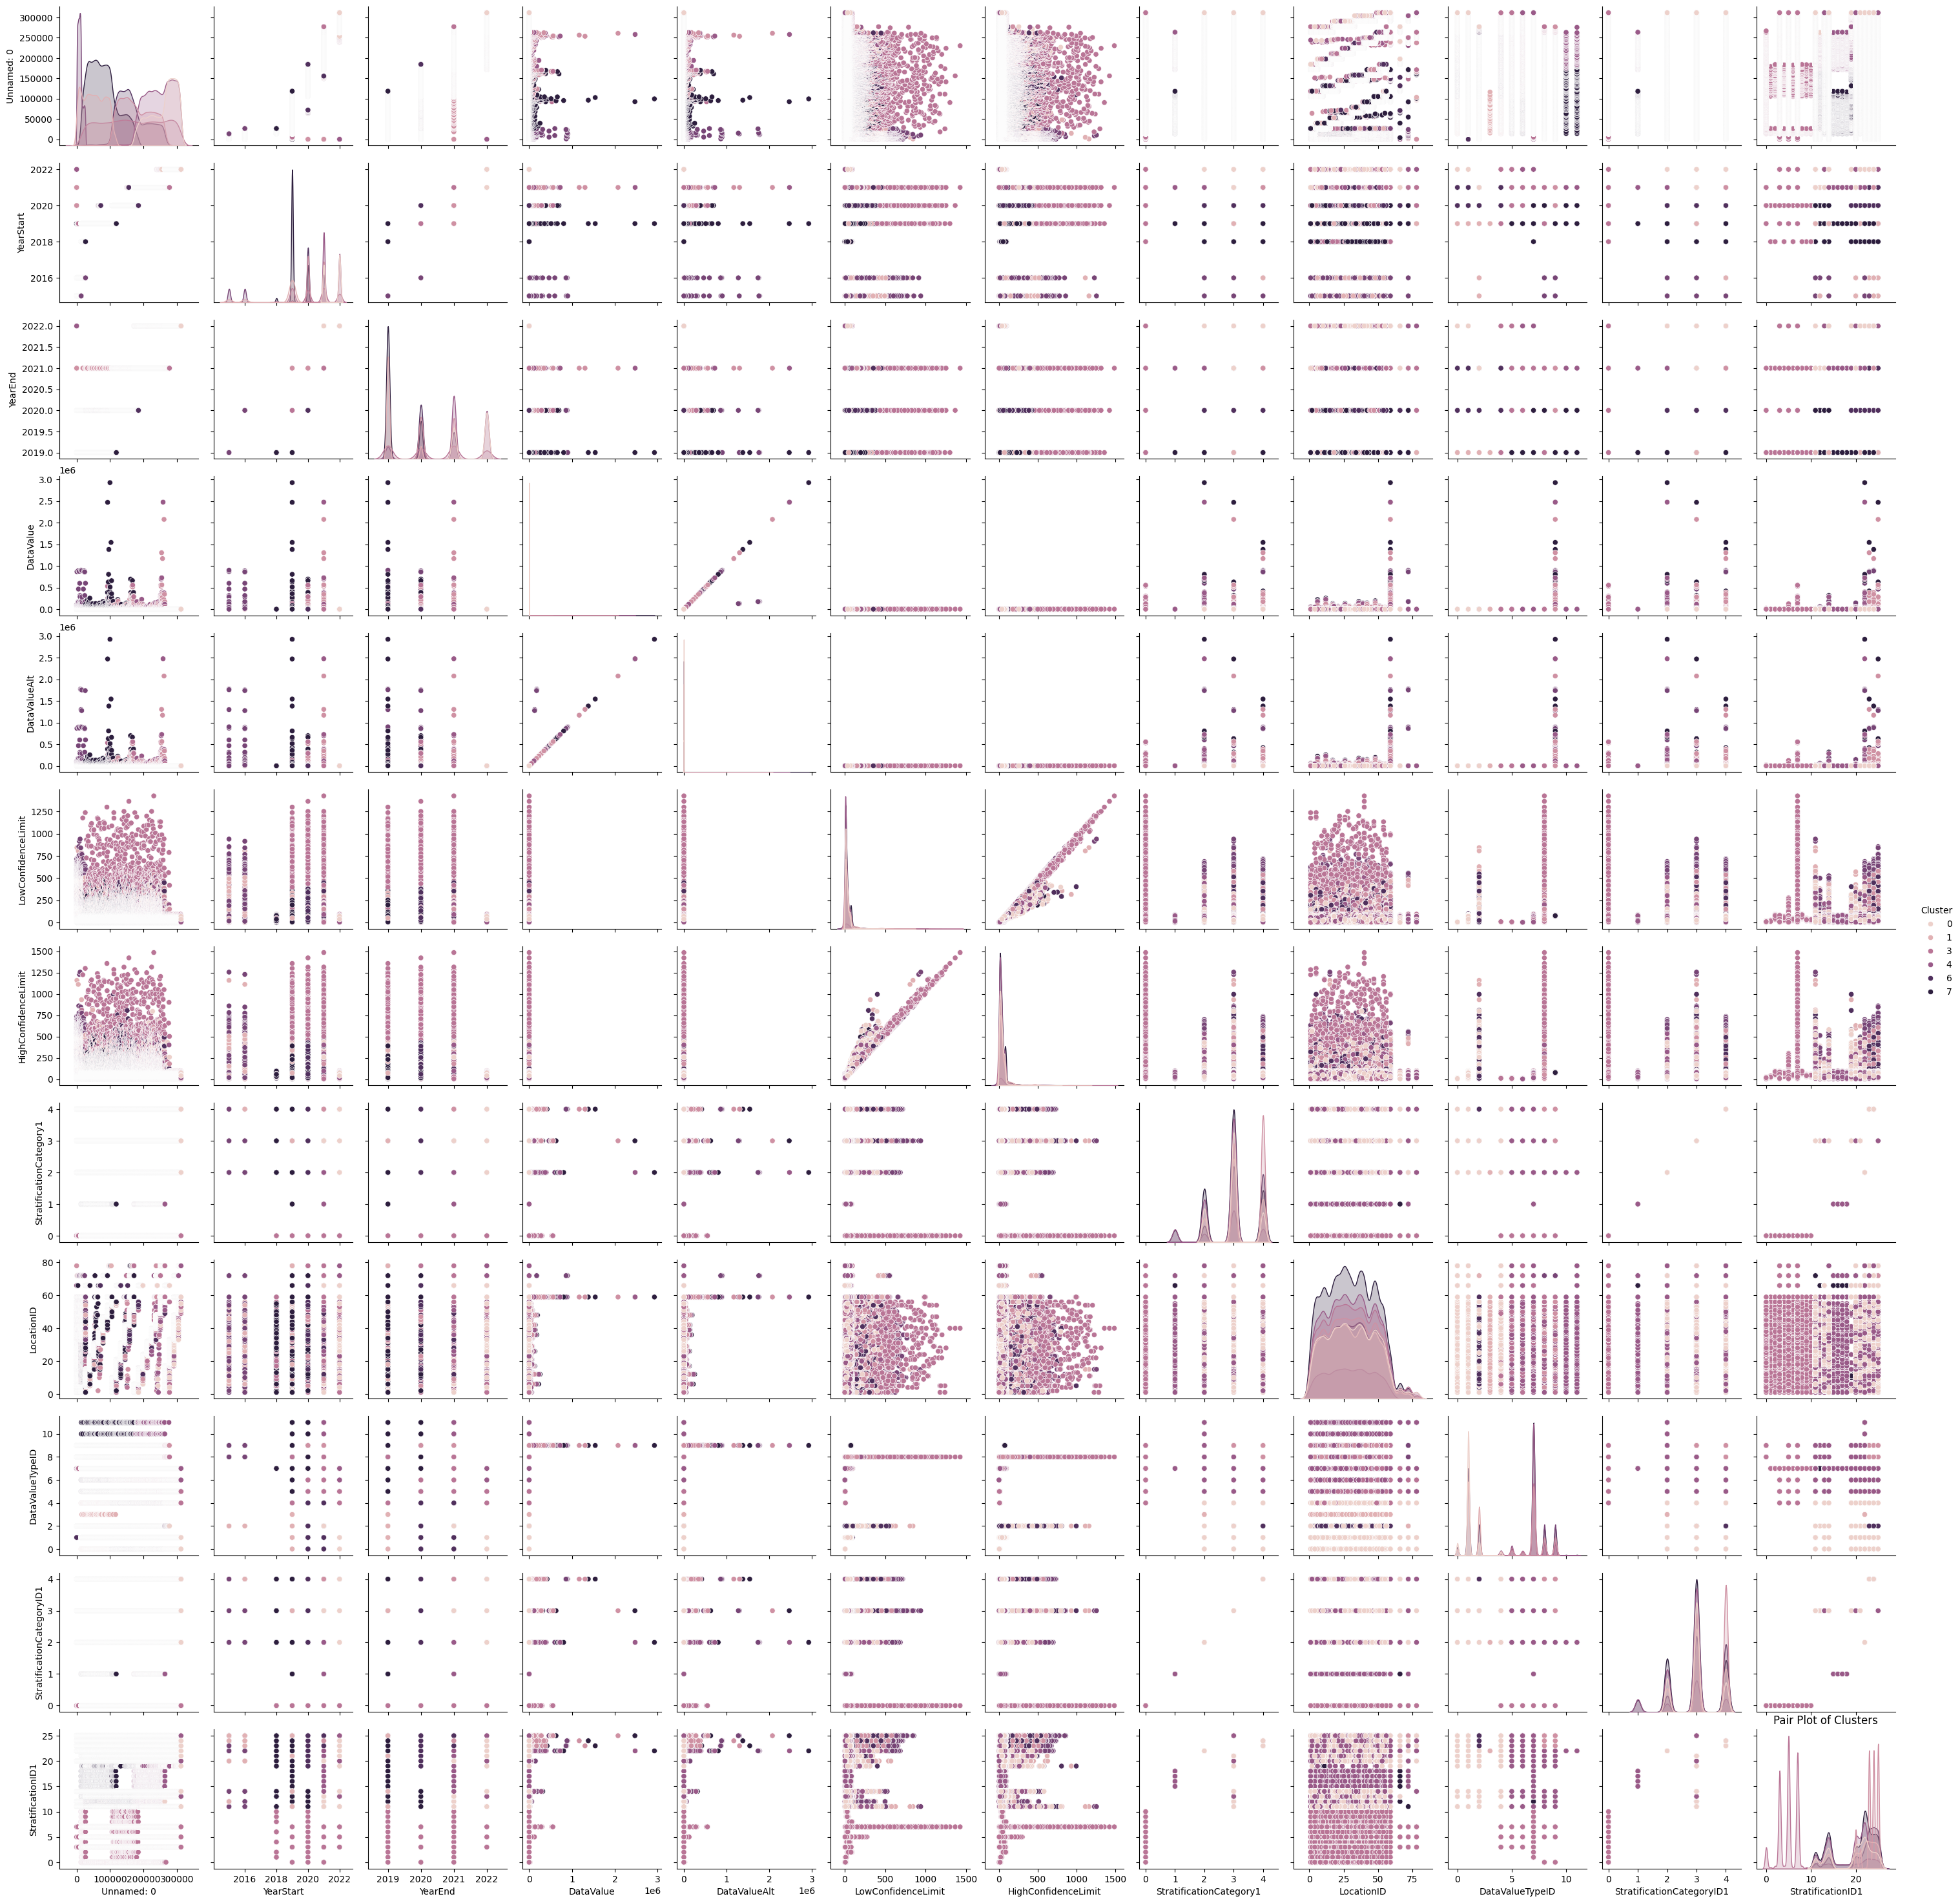

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['StratificationID1'] = le.fit_transform(df['StratificationID1'])
df['StratificationCategoryID1'] = le.fit_transform(df['StratificationCategoryID1'])
df['DataValueTypeID'] = le.fit_transform(df['DataValueTypeID'])

# Select the features you want to use for clustering
clustering_cols = ['DataValueTypeID', 'YearStart', 'YearEnd', 'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1']

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[clustering_cols])

# Perform k-means clustering
kmeans = KMeans(n_clusters=8).fit(df_scaled)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to the original dataframe
df['Cluster'] = labels

# Group by clusters and get the mean/median of the features
cluster_summary = df.groupby('Cluster')[clustering_cols].agg(['mean', 'median'])

# Print the cluster summary
print(cluster_summary)

# Visualize the clusters
sns.pairplot(df, hue='Cluster')
plt.title('Pair Plot of Clusters')
plt.show()